In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statannotations.Annotator import Annotator

In [8]:
data = pd.read_table("")
data.head()

,Tipo,Depth>=20,Median_coverage_for_mtDNA,Percentage_of_mtDNA_depth,Number_of_CNVs,Low_quality_variants,Total_reads,Reads_mapped,Reads_mapped_to_target,Duplicated_mapping,Usable_reads,Contamination,Median_insert_size,Average_Depth,Hom/Het_Ratio,Ti/Tv_Ratio,Z-Score,Coverage_MAPD,Log2_Ratio,Residual_Noise
0,Validation,0.982,251,1.0,90,10026,120400134,1.0,0.6163,0.2908,52626166,0.001,213,146,0.4898,2.7556,1.07,0.18,0.13,0.083
1,Validation,0.982,365,1.0,98,12840,137315212,1.0,0.6050,0.3115,57198078,0.001,206,159,0.4842,2.7682,1.04,0.17,0.13,0.082
2,Validation,0.981,287,1.0,138,9505,107213496,1.0,0.6225,0.2695,48759165,0.001,194,135,0.4834,2.7974,1.10,0.18,0.13,0.088
3,Validation,0.981,339,1.0,156,9027,109139908,1.0,0.6025,0.2889,46758191,0.001,197,130,0.5119,2.8257,1.11,0.19,0.13,0.088
4,Validation,0.980,256,1.0,161,10062,116769886,1.0,0.6198,0.2922,51224728,0.001,202,142,0.4385,2.7866,1.10,0.18,0.13,0.086


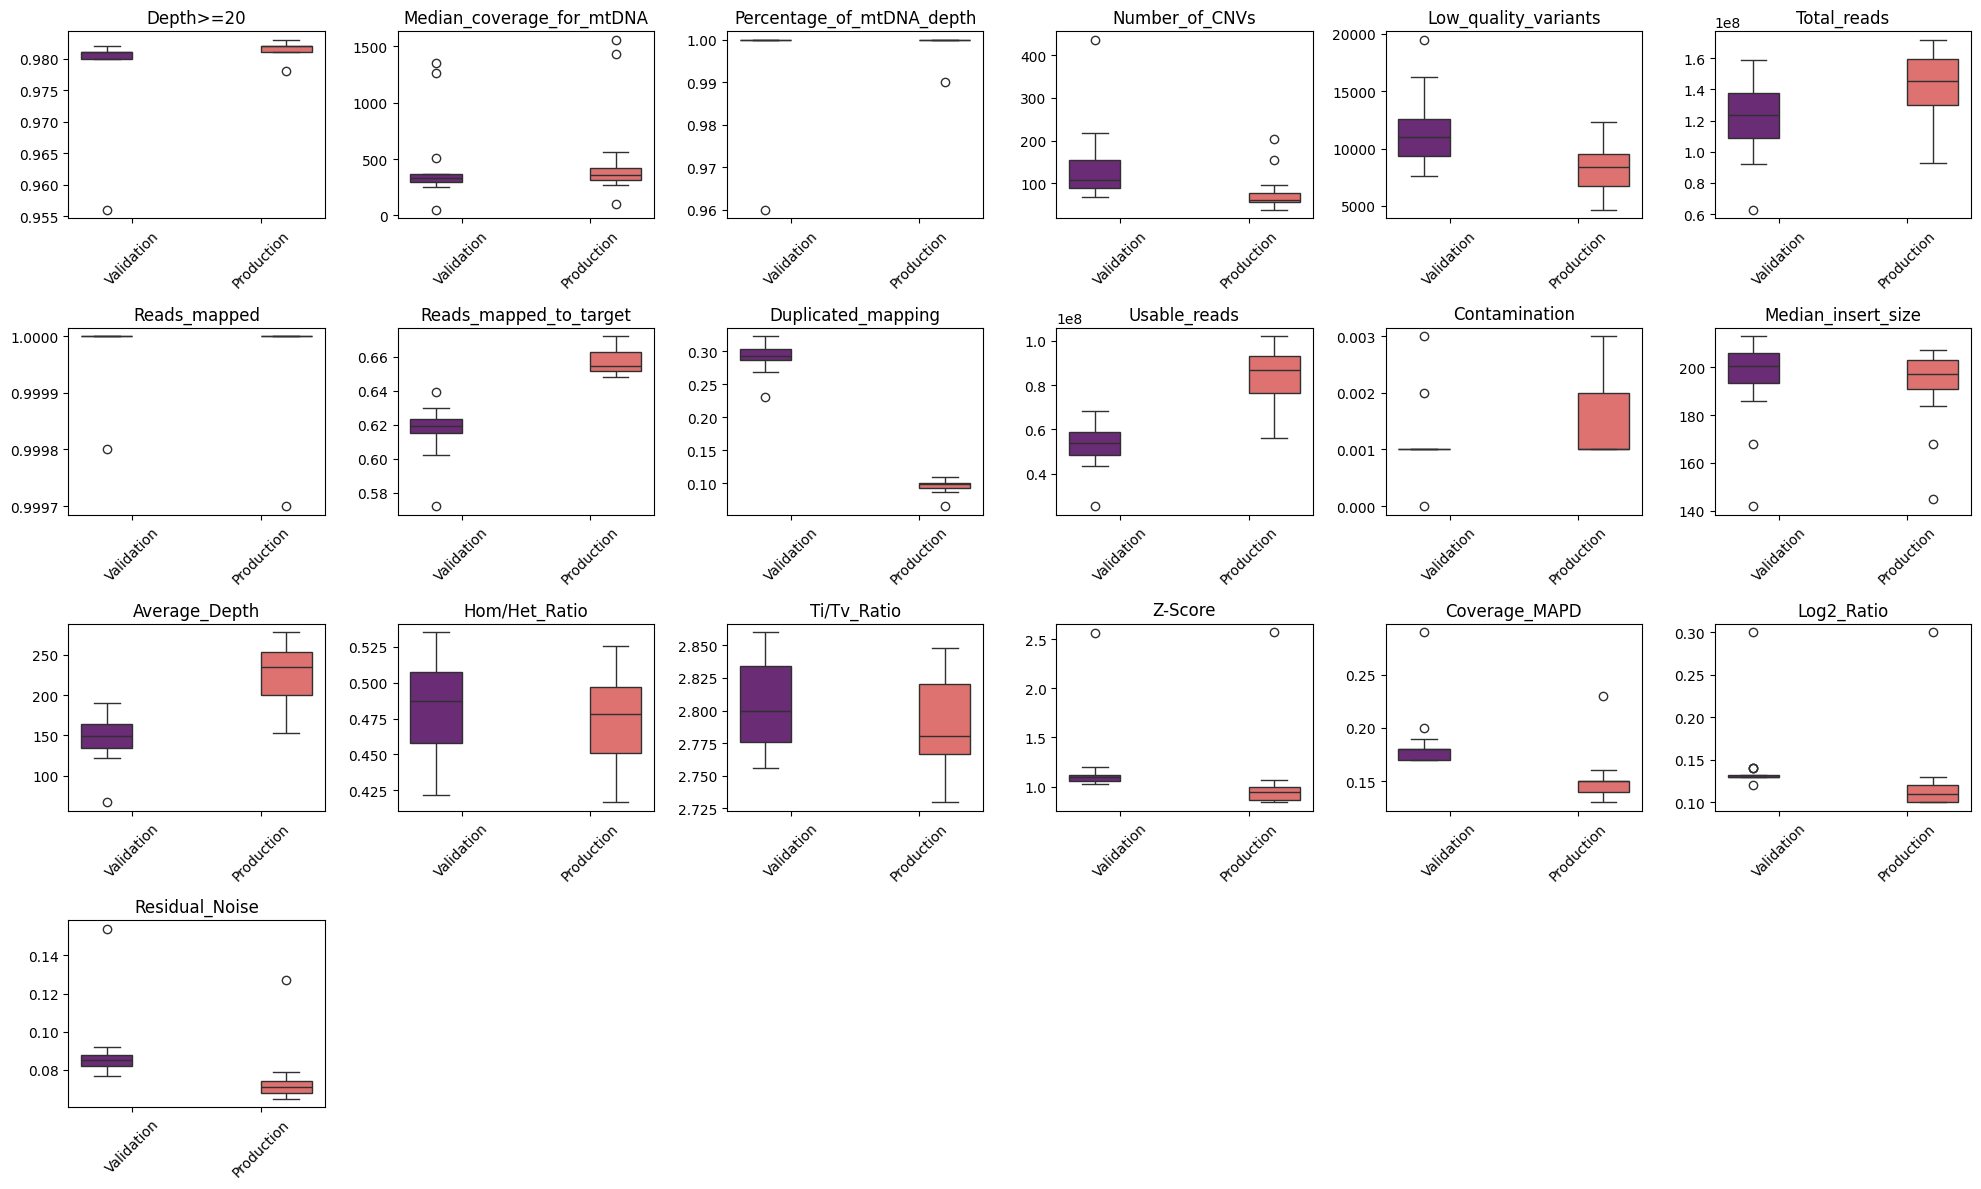

In [9]:
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
data_long = data.melt(id_vars="Tipo", var_name="Métrica", value_name="Valor")
metrics = data_long["Métrica"].unique()
ncols = 6
nrows = -(-len(metrics) // ncols)  # Arredondar para cima
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 3 * nrows), squeeze=False)

for i, metric in enumerate(metrics):
    row, col = divmod(i, ncols)
    subset = data_long[data_long["Métrica"] == metric]
    sns.boxplot(
        data=subset,
        x="Tipo",
        y="Valor",
        hue="Tipo",
        ax=axs[row, col],
        palette="magma",
        dodge=True
    )
    axs[row, col].set_title(metric)
    axs[row, col].tick_params(axis="x", rotation=45)
    axs[row, col].set_xlabel("")
    axs[row, col].set_ylabel("")

for i in range(len(metrics), ncols * nrows):
    row, col = divmod(i, ncols)
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()